# BUSINESS PROBLEM STATEMENT
# The bank has been experiencing financial loss due to loan default by customers
# The bank want to identify the customers characteristics who default their loans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\archive(8)\Loan_approval_data_2025.csv")
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [3]:
df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')

In [4]:
df.shape

(50000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [6]:
df.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


In [7]:
df.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

# DATA CLEANING
# The loan dataset cointains 50000 rows and 20columns
# The  dataset cointains (6)float dtype,(10)integer dtype,(4 ) object dtype
# The dataset was described to check the mean and the standard deviation whereby it requires scaling
# The dataset  does not cointain nullvalues and duplicated values

In [10]:
df.groupby('defaults_on_file').mean(numeric_only=True)

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
defaults_on_file,,,,,,,,,,,,,,,
0,35.125703,7.529804,50358.505388,646.516629,8.245411,3645.881587,14368.220471,0.504015,0.137979,33161.934243,15.397486,0.285782,0.701327,0.233771,0.581562
1,31.972326,6.128609,44830.955871,592.256918,6.803067,2706.050112,12913.877711,1.450636,0.318624,30916.978310,17.287996,0.284707,0.713892,0.237955,0.000000


# ANALYSIS
# customers who have defaulted their loan have the highest delinquencies in the last 2yrs
# customers who have defaulted their loan have the highest derogatory marks
# many customers default due to high interest rate
# customers who have defaulted their loan have the highest loan to income ratio
# customers who have defaulted their loan have the highest payment to income ratio

In [17]:
count=df.groupby('defaults_on_file')['product_type'].count()
count

defaults_on_file
0    47326
1     2674
Name: product_type, dtype: int64

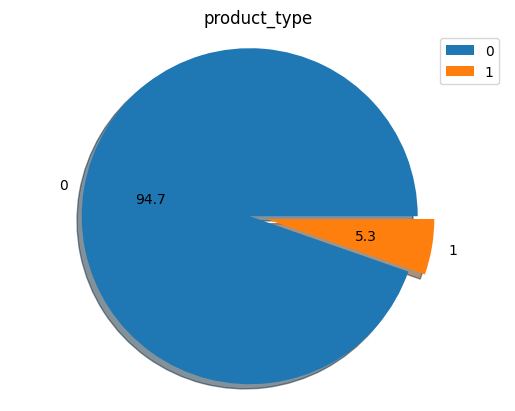

In [19]:
plt.pie(count,labels=count.index,autopct='%1.1f',shadow=True,explode=[0,0.1])
plt.axis('equal')
plt.legend()
plt.title('product_type')
plt.show()
        

# ANALYSIS
# There are only 5.3% of customers who default our default their loans

In [34]:
subdf=df[['delinquencies_last_2yrs','derogatory_marks','interest_rate','loan_to_income_ratio','payment_to_income_ratio','defaults_on_file']].copy()
subdf.head()

,delinquencies_last_2yrs,derogatory_marks,interest_rate,loan_to_income_ratio,payment_to_income_ratio,defaults_on_file
0,0,0,17.02,0.023,0.008,0
1,1,0,14.10,1.237,0.412,0
2,0,0,18.33,0.101,0.034,0
3,1,0,18.74,0.099,0.033,0
4,0,0,13.92,1.565,0.522,0


In [35]:
subdf.corr()

,delinquencies_last_2yrs,derogatory_marks,interest_rate,loan_to_income_ratio,payment_to_income_ratio,defaults_on_file
delinquencies_last_2yrs,1.000000,0.080497,0.163422,0.004666,0.004678,0.252034
derogatory_marks,0.080497,1.000000,0.142108,0.007274,0.007272,0.098411
interest_rate,0.163422,0.142108,1.000000,-0.078200,-0.078216,0.104561
loan_to_income_ratio,0.004666,0.007274,-0.078200,1.000000,0.999998,0.006069
payment_to_income_ratio,0.004678,0.007272,-0.078216,0.999998,1.000000,0.006063
defaults_on_file,0.252034,0.098411,0.104561,0.006069,0.006063,1.000000


# ANALYSIS
# payment_to_income_ratio positively correlate with loan_to_income_ratio by 0.999

In [36]:
subdf.drop(columns=['loan_to_income_ratio'],inplace=True)

In [37]:
subdf

,delinquencies_last_2yrs,derogatory_marks,interest_rate,payment_to_income_ratio,defaults_on_file
0,0,0,17.02,0.008,0
1,1,0,14.10,0.412,0
2,0,0,18.33,0.034,0
3,1,0,18.74,0.033,0
4,0,0,13.92,0.522,0
...,...,...,...,...,...
49995,0,0,21.31,0.362,0
49996,0,0,18.07,0.062,1
49997,0,0,17.45,0.320,0
49998,0,1,14.71,0.027,0


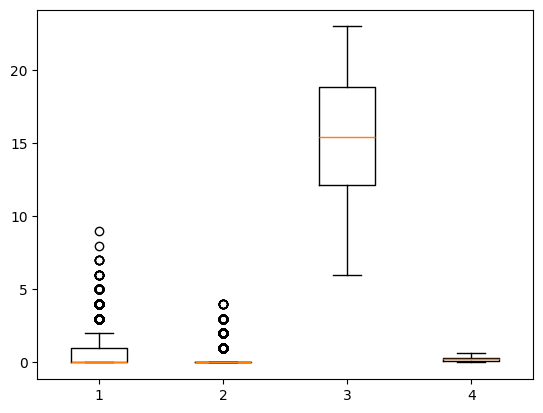

In [38]:
plt.boxplot(subdf[['delinquencies_last_2yrs','derogatory_marks','interest_rate','payment_to_income_ratio']])
plt.show()

In [39]:
q3=subdf['delinquencies_last_2yrs'].quantile(0.75)
q1=subdf['delinquencies_last_2yrs'].quantile(0.25)
iqr=q3-q1
subdf['delinquencies_last_2yrs']=q3-iqr*1.5
subdf['delinquencies_last_2yrs']=q1-iqr*1.5

q3=subdf['derogatory_marks'].quantile(0.75)
q1=subdf['derogatory_marks'].quantile(0.25)
iqr=q3-q1
subdf['derogatory_marks']=q3-iqr*1.5
subdf['derogatory_marks']=q1-iqr*1.5

In [40]:
x=subdf.drop(columns=['defaults_on_file'])

In [42]:
y=subdf['defaults_on_file']

# EXPLORATORY DATA ANALYSIS
# After analysis  5 features were identified that affect loan default
# correlation was done and identified multicolinearity between two indepedent variables payment_to_income_ratio and loan_to_income_ratio
# one of the independent variable was omitted because they serve the same purpose which is loan_to_income_ratio
# outliers was indentified in features derogatory_marks, delinquencies_last_2yrs
# IQR method was used to remove the outliers
# defaults_on_file is the target variable

In [44]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.1 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.0 MB 928.4 kB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.0 MB 928.4 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.0 MB 844.5 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.0 MB 844.5 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.0 MB 806.2 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.0 MB 800.1 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.0 MB 800.1 kB/s eta 0:00:09
   --------- --------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit(x_train)
x_tesr_scaled=scaler.fit_transform(x_test)

In [48]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2',C=0.1,class_weight='balanced',max_iter=1000,solver='lbfgs')
scores=cross_val_score(model,x,y,cv=skf)
model.fit(x_train,y_train)

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWar

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [54]:
y_pred=model.predict(x_test)

In [55]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [56]:
a=classification_report(y_test,y_pred)
print(a)

              precision    recall  f1-score   support

           0       0.96      0.58      0.72     14213
           1       0.06      0.52      0.11       787

    accuracy                           0.57     15000
   macro avg       0.51      0.55      0.42     15000
weighted avg       0.91      0.57      0.69     15000



In [57]:
accuracy_score(y_test,y_pred)

0.5733333333333334

In [58]:
confusion_matrix(y_test,y_pred)

array([[8187, 6026],
       [ 374,  413]])

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit(x_train)
x_test_scaled=scaler.transform(x_test)

In [68]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
tree=DecisionTreeClassifier(criterion='entropy')
scores=cross_val_score(tree,x,y,cv=skf)
tree.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the cu

In [69]:
y_pred=tree.predict(x_test)

In [70]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [71]:
b=classification_report(y_test,y_pred)
print(b)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14213
           1       0.10      0.11      0.11       787

    accuracy                           0.90     15000
   macro avg       0.53      0.53      0.53     15000
weighted avg       0.91      0.90      0.90     15000



In [72]:
accuracy_score(y_test,y_pred)

0.9018

In [73]:
confusion_matrix(y_test,y_pred)

array([[13437,   776],
       [  697,    90]])

# MODEL EVALUATION
# model comparison between Logisitic regression and decision tree classifier
# scaling and cross validation was done to the models l2(Ridge) regualrization was done to Logistic regression
# The recall of customers who defaulted in Logistic regression is 0.52 while in decision tree is 0.11
# The precision of customers who defaulted in Logistic regression is 0.06 while in decision tree is 0.10
# The f1 score of customers who defaulted in Logistic regression is 0.11 while in decision tree is 0.11
# The accuracy score of the logistic regression model  0.573 and descion tree is 0.9018

In [74]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [75]:
y_pred_log=model.predict_proba(x_test)
y_pred_tree=tree.predict_proba(x_test)

In [80]:
y_test_id=np.array(y_test).ravel()

In [81]:
fpr_log,tpr_log,threshold_log=roc_curve(y_test_id,y_pred_log[:,1])
fpr_tree,tpr_tree,threshold_tree=roc_curve(y_test_id,y_pred_tree[:,1])

In [82]:
auc_log=roc_auc_score(y_test_id,y_pred_log[:,1])
auc_tree=roc_auc_score(y_test_id,y_pred_tree[:,1])

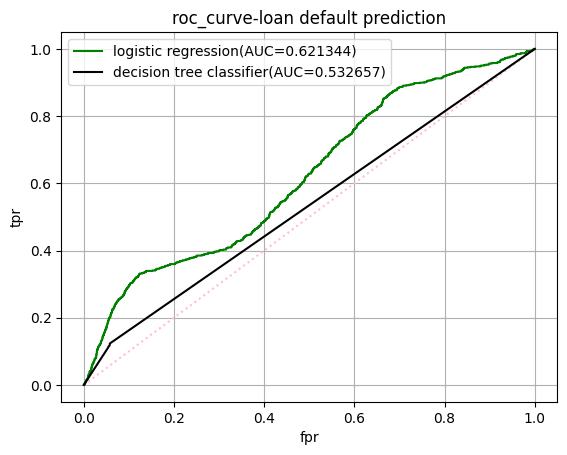

In [86]:
plt.plot([0,1],[0,1],linestyle='dotted',color='pink')
plt.plot(fpr_log,tpr_log,label=f'logistic regression(AUC={auc_log:4f})',color='green')
plt.plot(fpr_tree,tpr_tree,label=f'decision tree classifier(AUC={auc_tree:4f})',color='black')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve-loan default prediction')
plt.grid()
plt.legend()
plt.show()

# i converted 2Dimension_array y_test to 1Dimension_array
# on prediction i extracts positive class probabilities needed by roc_curve and roc_auc_score
# logistic regression have a larger area under the curve compared to decision tree classifier

# RECOMMEDATION
# according to the model above i have to my conclusion that the bank should come at balanced tradeoff
# between approvals and default prevention